<a href="https://colab.research.google.com/github/spchaane/DS-Python-Projects/blob/main/aus_weather_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
pip install -q sklearn

In [94]:
#Install PyDrive
!pip install -U -q PyDrive

**Predict whether there will be a rain or not using the Decision Tree Model**

In [95]:
#import pandas library
import pandas as pd

#import necessary modules for the PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


In [96]:
#installing additional librabries to be used when needed
from __future__ import absolute_import, division, print_function, unicode_literals
from IPython.display import clear_output
from six.moves import urllib

In [97]:
#authenticate and create a PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [98]:
#file path in the drive = https://drive.google.com/file/d/16ukcQ8vLowzzF8RX5uu0JhxKPs3iR4gS/view?usp=sharing
#Loads files from google drive storage
fileDownloaded = drive.CreateFile({"id":"16ukcQ8vLowzzF8RX5uu0JhxKPs3iR4gS"})

#Loading the files
fileDownloaded.GetContentFile("weatherAUS.csv")

In [99]:
#import Chardet module
import chardet

#open csv file
with open("weatherAUS.csv", mode="rb") as ifile:
    # read the byte count as it is
    raw_bytes = ifile.read()
    encoding_name = chardet.detect(raw_bytes)["encoding"]

In [100]:
#Using proper encoding to read the csv files
df = pd.read_csv("weatherAUS.csv", encoding='utf8', quotechar='"', delimiter=',') #training data

#see first 5 data row
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [101]:
#create a correlation matrix
import numpy as np
import matplotlib.pyplot as plt

print(round(df.corr(), 2))

               MinTemp  MaxTemp  Rainfall  ...  Cloud3pm  Temp9am  Temp3pm
MinTemp           1.00     0.74      0.10  ...      0.02     0.90     0.71
MaxTemp           0.74     1.00     -0.07  ...     -0.28     0.89     0.98
Rainfall          0.10    -0.07      1.00  ...      0.17     0.01    -0.08
Evaporation       0.47     0.59     -0.06  ...     -0.18     0.55     0.57
Sunshine          0.07     0.47     -0.23  ...     -0.70     0.29     0.49
WindGustSpeed     0.18     0.07      0.13  ...      0.11     0.15     0.03
WindSpeed9am      0.18     0.01      0.09  ...      0.05     0.13     0.00
WindSpeed3pm      0.18     0.05      0.06  ...      0.03     0.16     0.03
Humidity9am      -0.23    -0.50      0.22  ...      0.36    -0.47    -0.50
Humidity3pm       0.01    -0.51      0.26  ...      0.52    -0.22    -0.56
Pressure9am      -0.45    -0.33     -0.17  ...     -0.15    -0.42    -0.29
Pressure3pm      -0.46    -0.43     -0.13  ...     -0.08    -0.47    -0.39
Cloud9am          0.08   

Since there is no much relationship between the amount of Rainfall, Temp and Humidity, lets check the relationship between other variables. First lets extract the required columns

In [102]:
#read only specific columns 
df = pd.read_csv("weatherAUS.csv", usecols = ["MinTemp", "MaxTemp", "Humidity9am", "Humidity3pm", "Rainfall", "RainToday", "Pressure3pm", "Cloud3pm"])

print(df.head())

   MinTemp  MaxTemp  Rainfall  ...  Pressure3pm  Cloud3pm  RainToday
0     13.4     22.9       0.6  ...       1007.1       NaN         No
1      7.4     25.1       0.0  ...       1007.8       NaN         No
2     12.9     25.7       0.0  ...       1008.7       2.0         No
3      9.2     28.0       0.0  ...       1012.8       NaN         No
4     17.5     32.3       1.0  ...       1006.0       8.0         No

[5 rows x 8 columns]


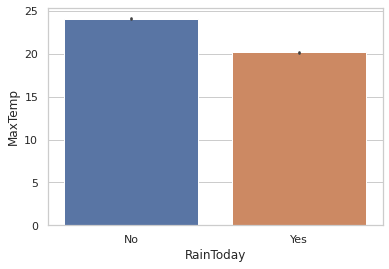

In [103]:
#visualize with barplot
import seaborn as sns

#visualize MaxTem and RainToday
sns.set(style = "whitegrid")
sns.barplot(x = df['RainToday'], y = df['MaxTemp'], data = df )
plt.show()

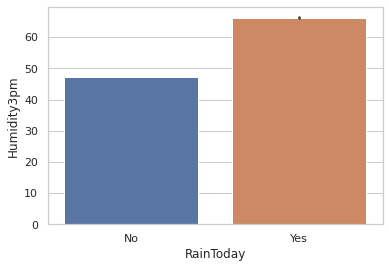

In [104]:
#visualize RainToday with Humidity at 3pm
sns.barplot(x = df['RainToday'], y = df['Humidity3pm'])
plt.show()

In [105]:
#check the missing values
na_columns = df.isna().sum()
#filter columns with at least 1 missing values
na_columns = na_columns[na_columns != 0]
#print number of na_columns
print("Columns Missing Values: ", len(na_columns))

#Create a correlation with all the columns
c = list(na_columns.index)
c.append("RainToday")
df[c].corr()

Columns Missing Values:  8


,MinTemp,MaxTemp,Rainfall,Humidity9am,Humidity3pm,Pressure3pm,Cloud3pm
MinTemp,1.000000,0.736555,0.103938,-0.232899,0.006089,-0.461292,0.021605
MaxTemp,0.736555,1.000000,-0.074992,-0.504110,-0.508855,-0.427167,-0.277921
Rainfall,0.103938,-0.074992,1.000000,0.224405,0.255755,-0.126534,0.172403
Humidity9am,-0.232899,-0.504110,0.224405,1.000000,0.666949,0.186858,0.357326
Humidity3pm,0.006089,-0.508855,0.255755,0.666949,1.000000,0.051997,0.523120
Pressure3pm,-0.461292,-0.427167,-0.126534,0.186858,0.051997,1.000000,-0.084778
Cloud3pm,0.021605,-0.277921,0.172403,0.357326,0.523120,-0.084778,1.000000


In [106]:
#Convert RainToday yes = 1 and no = 0 so that we can use it at a later stage
df["RainToday"].replace({"No": 0, "Yes": 1}, inplace = True)

print(df["RainToday"])

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
145455    0.0
145456    0.0
145457    0.0
145458    0.0
145459    0.0
Name: RainToday, Length: 145460, dtype: float64


Lets see the effects that temperature and humidity have on the rainfall

**Data Cleaning**

Lets clean the data to only remain with the useful information

In [107]:
#check the missing values
na_columns = df.isna().sum()
#filter columns with at least 1 missing values
na_columns = na_columns[na_columns != 0]
#print number of na_columns
print("Columns Missing Values: ", len(na_columns))

Columns Missing Values:  8


In [108]:
#Print those columns in descending order
na_columns.sort_values(ascending = False)

Cloud3pm       59358
Pressure3pm    15028
Humidity3pm     4507
RainToday       3261
Rainfall        3261
Humidity9am     2654
MinTemp         1485
MaxTemp         1261
dtype: int64

In [109]:
#check percentage of missing data
print("Rainfall % of missing data: ", round((3261/len(df["Rainfall"])) * 100 , 3))

Rainfall % of missing data:  2.242


In [110]:
#fill the missing values with 0 since the missing percentage is too small
df.fillna(0, inplace = True)

**Multivariable regression**

In [111]:
#create a multiple regression
from sklearn import linear_model

#create independent variable and dependent variable
x = df[["MaxTemp", "Humidity3pm"]]
y = df["RainToday"]


#use the LinearRegression() method 
regr = linear_model.LinearRegression()
regr.fit(x, y)

print("Regression Coefficient: ", regr.coef_)

Regression Coefficient:  [-0.00478924  0.00564252]


The Regression Coeeficient shows that when MaxTem, Humidity3pm increases by 1degrees, 1% respectively, chances of rain increases by -0.00478924, 0.00564252 respectively

In [112]:
#Predict rain when the maximum temp is 15 and humidity is 78
predicted_rain = regr.predict([[16, 78]])

print(predicted_rain)

[0.41110414]


In [113]:
#create independent variable and dependent variable
x = df[["MaxTemp", "Humidity3pm"]]
y = df["Pressure3pm"]


#use the LinearRegression() method 
regr = linear_model.LinearRegression()
regr.fit(x, y)

print("Regression Coefficient: ", regr.coef_)

#predict pressure when MaxTemp is 26 and Humidity is 41
predict_pressure = regr.predict([[26, 41]])

print(predict_pressure)

Regression Coefficient:  [8.31782253 1.92857819]
[917.90715022]


**Decision Tree**

Using Decision tree to decide whether it is going to rain or not, the probability will be based on the previous info

In [114]:
#create a dataframe
#Using proper encoding to read the csv files
df_2 = pd.read_csv("weatherAUS.csv", encoding='utf8', quotechar='"', delimiter=',') #training data

In [115]:
#import necessary modules
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import pydotplus

In [116]:
df_2.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


**Clean Data**

In [117]:
#check the missing values
na_columns = df_2.isna().sum()
#filter columns with at least 1 missing values
na_columns = na_columns[na_columns != 0]

print(na_columns.sort_values(ascending = False))

Sunshine         69835
Evaporation      62790
Cloud3pm         59358
Cloud9am         55888
Pressure9am      15065
Pressure3pm      15028
WindDir9am       10566
WindGustDir      10326
WindGustSpeed    10263
Humidity3pm       4507
WindDir3pm        4228
Temp3pm           3609
RainTomorrow      3267
Rainfall          3261
RainToday         3261
WindSpeed3pm      3062
Humidity9am       2654
WindSpeed9am      1767
Temp9am           1767
MinTemp           1485
MaxTemp           1261
dtype: int64


In [118]:
#Since we are going to forecast the data of 3pm, we can remove all the columns with 9am data
df_2.drop(columns = ["Sunshine", "Evaporation","WindGustDir", "Cloud9am", "Pressure9am", "Pressure3pm", "WindDir9am", "WindDir3pm", "WindGustSpeed", "RainTomorrow", "WindSpeed3pm", "WindSpeed9am", "Temp9am"], inplace = True)

In [119]:
df.head()

,MinTemp,MaxTemp,Rainfall,Humidity9am,Humidity3pm,Pressure3pm,Cloud3pm,RainToday
0,13.4,22.9,0.6,71.0,22.0,1007.1,0.0,0.0
1,7.4,25.1,0.0,44.0,25.0,1007.8,0.0,0.0
2,12.9,25.7,0.0,38.0,30.0,1008.7,2.0,0.0
3,9.2,28.0,0.0,45.0,16.0,1012.8,0.0,0.0
4,17.5,32.3,1.0,82.0,33.0,1006.0,8.0,0.0


In [120]:
#remove rows in RainToday which have a missing data, keeping them will misslead us since we are going to have 0 as No and Yes as 1
df_2["RainToday"].dropna(inplace = True)

In [121]:
#check if we still have any rows with missing data
df_2["RainToday"].isna().sum()

3261

In [122]:
#fill other columns with missing values with 0 since the missing percentage is too small
df_2.fillna(0, inplace = True)

print(df_2.isna().sum())

Date           0
Location       0
MinTemp        0
MaxTemp        0
Rainfall       0
Humidity9am    0
Humidity3pm    0
Cloud3pm       0
Temp3pm        0
RainToday      0
dtype: int64


In [123]:
#verify if there is no column with missing data
print("Missing Data: ", len(na_columns))
#print unique values of Location:
locations = df_2["Location"].unique()
print(locations)
print(len(locations))

Missing Data:  21
['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
49


In [124]:
#Convert non-numerical values into numerical values.
#Locations
areas = {key:value for key,value in zip(locations, range(0, len(locations)))} #creates a d dictionary
df_2["Location"] = df_2["Location"].map(areas) #maps new values into a Location column

#Yes and No answers
yes_no = {"Yes": 1, "No": 0}
df_2["RainToday"] = df_2["RainToday"].map(yes_no)

In [125]:
print(df_2["RainToday"].head())
print(df_2["Location"].head())

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: RainToday, dtype: float64
0    0
1    0
2    0
3    0
4    0
Name: Location, dtype: int64


**Feature and Target Columns**

Seperate feature columns from target column **df["RainToday"]**

In [126]:
#checking which to keep since other factors dont have much influence on the target column
df_2.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am',
       'Humidity3pm', 'Cloud3pm', 'Temp3pm', 'RainToday'],
      dtype='object')

The focus of the model will be in the afternoon, meaning 3pm since we have both 9am and 3pm data

In [127]:
#Creating feature columns
features = ["Temp3pm", "Humidity3pm", "Cloud3pm"]

X = df_2[features] 
y = df_2["RainToday"] #target column

print(X.head())
print("\ny\n", y.head())
print("\ny missing values: ", y.isna().sum())

   Temp3pm  Humidity3pm  Cloud3pm
0     21.8         22.0       0.0
1     24.3         25.0       0.0
2     23.2         30.0       2.0
3     26.5         16.0       0.0
4     29.7         33.0       8.0

y
 0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: RainToday, dtype: float64

y missing values:  3261


Creating a decition tree and saving it as image, thereafter show the image

In [128]:
#fill in missing values in y with 0
y.fillna(0, inplace = True)

In [129]:
y.isna().sum()

0

In [130]:
#fit the data into the model
decision_tree = DecisionTreeClassifier() #assign dtree to a classifier model
decition_tree = decision_tree.fit(X, y) #fit X and y to the classifier

data = tree.export_graphviz(decision_tree, out_file = None, feature_names =  features)

In [ ]:
#Graph the decision tree with the generated data
graph = pydotplus.graph_from_dot_data(data)
graph.write_png("WeatherAUS_Decision_Tree.png")

img = pltimg.imread("WeatherAUS_Decision_Tree.png")
imgplot = plt.imshow(img)
plt.show()